# **Reinforcement Learning - 2021**
# **COMS4047A/COMS7053A**

## **MDPs Assignment**

---

## Justin Abrams 2483251
## Ashton Naidoo 2519631
##Riekert Holder 2517888
## Humbulani Colbert Nekhumbe 2340639


---

# Library Imports
***

In [ ]:
import numpy as np
import random
import time
from IPython.display import clear_output

# Function Definitions

In [ ]:
def createWorld(): 
    """
    Generates a 7x7 grid world padded with -1's.
    -1's indicate walls/obsticles.
    """
    gridWorld = np.zeros((9,9))
    
    # Internal Walls
    gridWorld[3,1:7] = -1 
    
    # External Walls
    gridWorld[0,:] = -1
    gridWorld[8,:] = -1
    gridWorld[:,0] = -1
    gridWorld[:,8] = -1
   
    gridWorld[7,1] = 0 # for debugging
    gridWorld[1,1] = 20
    
    return gridWorld

def optimalPath(): 
    
    gridWorld = np.zeros((9,9))
    
    # Internal Walls
    gridWorld[3,1:7] = -1 
    
    # External Walls
    gridWorld[0,:] = -1
    gridWorld[8,:] = -1
    gridWorld[:,0] = -1
    gridWorld[:,8] = -1
    
    # Building one of the optimal pathes 
    gridWorld[7,1:8] = 1
    gridWorld[1,2:8] = 1
    gridWorld[2:7,7] = 1
    
    gridWorld[7,1] = 1 #debugging
    gridWorld[1,1] = 20
    
    return gridWorld

def addToPath(agent, action):
    if action == 'N':
        agent['path'][agent['stateR']-1][agent['stateC']-1] = "\u2191"
    elif action == 'S':
        agent['path'][agent['stateR']-1][agent['stateC']-1] = "\u2193" 
    elif action == 'E':
        agent['path'][agent['stateR']-1][agent['stateC']-1] = "\u2192" 
    elif action == 'W':
        agent['path'][agent['stateR']-1][agent['stateC']-1] = "\u2190"
    else:
        agent['path'][agent['stateR']-1][agent['stateC']-1] = "\u272F"

def printPath(agent):
    for x in range(7):
        print(agent['path'][x])

# def printPath(agent):
#     for x in range(7):
#         print("-" * 15)
#         for y in range(7):
#             print("|", agent['path'][x][y], end='', sep='')
#         print("|")
#     print("-" * 15)


def optimalGrid(): 
    """
    # defines optimal policy grid.
    """
    policy = np.zeros((9,9))
    
    policy[3,1:7] = -1 # Internal Wall
    policy[0,:] = -1
    policy[8,:] = -1
    policy[:,0] = -1
    policy[:,8] = -1
    
    policy[4, 1:7] = 2            # 2 
    policy[2:8, 7] = 1            # 1
    policy[2,1] = 1               # 1
    policy[1,2:8] = 3             # 4

    for i in range(1,6):
        policy[2, 1+i] = 13         # 12

    for i in range(3):
        for x in range(6): 
            policy[5+i,1+x] = 12    #14
            
    return policy

def optimalPolicy(agent, policy, aGridWorld):
    '''
    Defines optimal policy and makes an optimal choice based off of the policy.
    Integers indicate directions as follows:
    1 : North
    2 : East
    3 : West
    12 : North or East
    13 : North or West
    '''
    # printing pathes taken
    if aGridWorld[agent['stateR'], agent['stateC']] == -2:
        aGridWorld[agent['stateR'], agent['stateC']] = 0
    else:
        aGridWorld[agent['stateR'], agent['stateC']] = -2
    
    # make optimal choice based on optimal policy grid
    if policy[agent['stateR'], agent['stateC']] == 12:
        choice = random.choice(['N','E'])
    elif policy[agent['stateR'], agent['stateC']] == 13:
        choice = random.choice(['N','W'])
    elif policy[agent['stateR'], agent['stateC']] == 1:
        choice = 'N' 
    elif policy[agent['stateR'], agent['stateC']] == 2:
        choice = 'E'
    elif policy[agent['stateR'], agent['stateC']] == 3:
        choice = 'W'

    else:
        print('Weird Direction: {}'.format(policy[agent['stateR'], agent['stateC']]))
        
    return choice

def createAgent():
    randomAgent = {
        'stateR' : 7, #initial state set to start position
        'stateC' : 1, #initial state set to start position
        'goalR' : 1,
        'goalC' : 1,
        'actionState' : 'stop',
        'reward' : 0,
        'path' : [['.' for i in range(7)] for j in range(7)]
    }
    return randomAgent


def showDict(arg):
    for key, value in arg.items():
        print("{}: \t{}".format(key,value))       
        
def randomPolicy():
    choice = random.choice(['N','S','E','W'])
    return choice

def checkPotentialReward(agentState, aGridWorld):
    if aGridWorld[agentState['stateR'], agentState['stateC']] == -2:
        aGridWorld[agentState['stateR'], agentState['stateC']] = 0
    else:
        aGridWorld[agentState['stateR'], agentState['stateC']] = -2
    potentialRewards = {
        'N'    : aGridWorld[agentState['stateR'] - 1, agentState['stateC']],
        'S'    : aGridWorld[agentState['stateR'] + 1, agentState['stateC']],
        'E'    : aGridWorld[agentState['stateR'], agentState['stateC'] + 1],
        'W'    : aGridWorld[agentState['stateR'], agentState['stateC'] - 1],
        'Stop' : aGridWorld[agentState['stateR'], agentState['stateC']]
        }
    
    return potentialRewards


def greedyPolicy(checkPotentialReward):
    """
    input:
    A dictionary containing directions to take and thier corresponding rewards.
    
    Output:
    Returns a key from the input dict of the best direction to take, or
    a random best decision if there are mutiple decisions with equal highest reward.
    
    """  
    # avoidWalls dict, but also rewards that will avoid obsticles
    avoidWalls = {key : value for key, value in checkPotentialReward.items() if value != -1 and key != 'Stop'} 
    
    #print("avoidWalls")
    print("Possible Rewards" + str(avoidWalls))
    
    maxReward = max(avoidWalls, key = avoidWalls.get) # NB, this stores 1 key with the biggest value
    #return maxReward

    count = 0
    maxDuplicates = {}
    for key, value in avoidWalls.items():
        if value == avoidWalls[maxReward]:
            count += 1
            maxDuplicates.update({key:value})
            
    if count == 1:
        return maxReward
    if count > 1:
        return random.choice(list(maxDuplicates.keys())) 

def exeAction(randomAgent, choice):
    """
    Recieves an agent's state and required action to take.
    Exectutes the action
    Updates the state
    Returns the new state and a reward based on the action taken
    
    NB! Reward returned is only for the the action taken
    """

    addToPath(randomAgent, choice)

    if choice == 'N':
        randomAgent['stateR'] -= 1 
        reward = -1
    elif choice == 'S':
        randomAgent['stateR'] += 1 
        reward = -1
    elif choice == 'E':
        randomAgent['stateC'] += 1
        reward = -1 
    elif choice == 'W':
        randomAgent['stateC'] -= 1
        reward = -1 
    else:
        print('Agent stopped at position x: {} y: {}'.format(randomAgent['stateR'],randomAgent['stateC'])) 
        reward = 0
        
    randomAgent['reward'] += reward
    
    return randomAgent['stateR'], randomAgent['stateC'], reward 

def checkState(agentState):
    if agentState['stateR'] == agentState['goalR'] and agentState['stateC'] == agentState['goalC']:
        agentState['reward'] += 20
        print("Goal Reached!!!")
        return True
    else:
        return False
    


# Random Agent
The agent randomly chooses a direction. <br>
If the direction chosen is a wall, then the agents state/position stays the same but still recieves a reward of -1 for moving.

In [ ]:
#random agent test
gridWorld1 = createWorld()
randomAgent1 = createAgent()
for i in range(50):
    if checkState(randomAgent1) != True:
        clear_output(wait=True) #clears the notbook output
        checkPot = checkPotentialReward(randomAgent1, gridWorld1)# checks what the reward of the actions are
        choice = randomPolicy() # randomly chooses an action
        print('Agent Reward: {}'.format(randomAgent1['reward']))
        
        showDict(checkPot)
        
        if checkPot[choice] != -1:
            exeAction(randomAgent1, choice)
        else:
            randomAgent1['reward'] -= 1
        

        #showDict(checkPot)
        #print(gridWorld1)
        printPath(randomAgent1)
        time.sleep(0.2)
    if checkState(randomAgent1):
        exeAction(randomAgent1, 'Stop')
        printPath(randomAgent1)
        break



Agent Reward: -49
N: 	0.0
S: 	0.0
E: 	0.0
W: 	-2.0
Stop: 	0.0
['.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.']
['→', '↓', '.', '.', '↓', '.', '.']
['↑', '→', '↓', '←', '↓', '↓', '.']
['↑', '↑', '↓', '↑', '←', '↑', '.']
['↑', '.', '→', '→', '→', '↑', '.']


# Greedy Agent (Random)
This agent chooses the best/maximum reward. <br>
If there are maximum rewards which are equal, the agent will randomly choose one.

In [ ]:
# greedy agent that chooses randomly when there are multiple maximum/optimal rewards
gridWorld2 = createWorld()
randomAgent2 = createAgent()

for i in range(50):
    if checkState(randomAgent2) != True:
        clear_output(wait=True) #clears the notbook output
        checkPot = checkPotentialReward(randomAgent2, gridWorld2) #Check what the rewards are
        choice = greedyPolicy(checkPot) # Choose the direction with highest reward
        print('Direction chosen: {}'.format(choice))
        print('Agent Reward: {}'.format(randomAgent2['reward']))
        exeAction(randomAgent2, choice) # make agent move in that direction
        #showDict(checkPot)
        #print(gridWorld2)
        printPath(randomAgent2)
        time.sleep(0.5)
    if checkState(randomAgent2):
        clear_output(wait=True) #clears the notbook output
        #print(gridWorld2)
        printPath(randomAgent2)
        exeAction(randomAgent2, 'Stop')
        print('Agent Reward: {}'.format(randomAgent2['reward']))
        break


    

['.', '←', '←', '.', '↓', '←', '←']
['.', '.', '↑', '←', '←', '.', '↑']
['.', '.', '.', '.', '.', '.', '↑']
['.', '→', '→', '→', '→', '→', '↑']
['.', '↑', '←', '←', '←', '←', '←']
['.', '.', '.', '→', '↓', '.', '↑']
['→', '→', '→', '↑', '→', '→', '↑']
Agent stopped at position x: 1 y: 1
Agent Reward: -12


# Greedy Agent (Fixed Optimal Path)
This agent chooses the best/maximum reward. It's choice is based on a fixed optimal path.

In [ ]:
# greedy agent with preset optimal path
gridWorld3 = optimalPath()
randomAgent3 = createAgent()

for i in range(50):
    if checkState(randomAgent3) != True:
        clear_output(wait=True) #clears the notbook output
        checkPot = checkPotentialReward(randomAgent3, gridWorld3) #Check what the rewards are
        
        #showDict(checkPot)
        
        choice = greedyPolicy(checkPot) # Choose the direction with highest reward
        print('Direction chosen: {}'.format(choice))
        print('Agent Reward: {}'.format(randomAgent3['reward']))
        exeAction(randomAgent3, choice) # make agent move in that direction

        #print(gridWorld3)
        printPath(randomAgent3)
        time.sleep(0.5)
    if checkState(randomAgent3):
        clear_output(wait=True) #clears the notbook output
        #print(gridWorld3)
        printPath(randomAgent3)
        exeAction(randomAgent3, 'Stop')
        print('Agent Reward: {}'.format(randomAgent3['reward']))
        break


   

['.', '←', '←', '←', '←', '←', '←']
['.', '.', '.', '.', '.', '.', '↑']
['.', '.', '.', '.', '.', '.', '↑']
['.', '.', '.', '.', '.', '.', '↑']
['.', '.', '.', '.', '.', '.', '↑']
['.', '.', '.', '.', '.', '.', '↑']
['→', '→', '→', '→', '→', '→', '↑']
Agent stopped at position x: 1 y: 1
Agent Reward: 2


# Greedy Agent (Optimal Policy)
This agent chooses the best/maximum reward based on an optimal policy. <br>
For choices where there are two directions defined, 
the agent will randomly choose one.

In [ ]:
# greedy agent test with optimal policy
gridWorld4 = createWorld()
randomAgent4 = createAgent()
policy = optimalGrid()

for i in range(50):
    if checkState(randomAgent4) != True:
        clear_output(wait=True) #clears the notbook output
        
        choice  = optimalPolicy(randomAgent4, policy ,gridWorld4)
        print('Direction chosen: {}'.format(choice))
        exeAction(randomAgent4, choice) # make agent move in that direction
        
        print('Agent Reward: {}'.format(randomAgent4['reward']))
        #print(gridWorld4)
        printPath(randomAgent4)
        time.sleep(0.5)
    if checkState(randomAgent4):
        clear_output(wait=True) #clears the notbook output
        #print(gridWorld4)
        printPath(randomAgent4)
        exeAction(randomAgent4, 'Stop')
        print('Agent Reward: {}'.format(randomAgent4['reward']))
        break
        


['.', '←', '←', '←', '←', '←', '←']
['.', '.', '.', '.', '.', '.', '↑']
['.', '.', '.', '.', '.', '.', '↑']
['.', '.', '.', '.', '.', '.', '↑']
['.', '.', '.', '→', '→', '→', '↑']
['.', '.', '→', '↑', '.', '.', '.']
['→', '→', '↑', '.', '.', '.', '.']
Agent stopped at position x: 1 y: 1
Agent Reward: 2


# Bar Graphs
A bar graph of the returns accumulated by the random agent and the greedy agent with optimal value function,
averaged over 20 runs each.

In [ ]:
iterations = list(range(1, 21))
rewardsAvg1 = []
rewardsAvg2 = []

In [ ]:

#random agent test
meanR = 0
for i in range(20):
    gridWorld1 = createWorld()
    agent = createAgent()
    for i in range(50):
        if checkState(agent) != True:
            clear_output(wait=True) #clears the notbook output
            checkPot = checkPotentialReward(agent, gridWorld1)# checks what the reward of the actions are
            choice = randomPolicy() # randomly chooses an action
            
            if checkPot[choice] != -1:
                exeAction(agent, choice)
            else:
                agent['reward'] -= 1
            
        if checkState(agent):
            exeAction(agent, 'Stop')
            break

    meanR += agent['reward']
meanR = meanR/20.0
print(meanR)

-50.0


In [ ]:
# greedy agent test with optimal policy
meanG = 0
for iter in range(20):
    gridWorld4 = createWorld()
    randomAgent4 = createAgent()
    policy = optimalGrid()
    for i in range(50):
        if checkState(randomAgent4) != True:
            clear_output(wait=True) #clears the notbook output
            
            choice  = optimalPolicy(randomAgent4, policy ,gridWorld4)
            exeAction(randomAgent4, choice) # make agent move in that direction
            
        if checkState(randomAgent4):
            clear_output(wait=True) #clears the notbook output
            exeAction(randomAgent4, 'Stop')
            break
    meanG += randomAgent4['reward']
meanG = meanG/20.0
print(meanG)

Agent stopped at position x: 1 y: 1
2.0


In [ ]:
import matplotlib.pyplot as plt

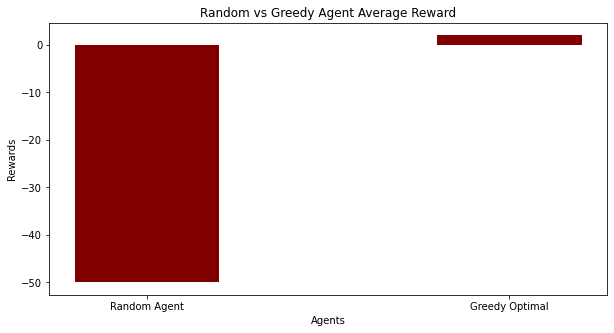

In [ ]:
data = {'Random Agent':meanR, 'Greedy Optimal':meanG}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Agents")
plt.ylabel("Rewards")
plt.title("Random vs Greedy Agent Average Reward")
plt.show()

Greedy optimal policy

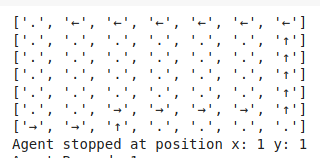

Random Agent optimal Policy

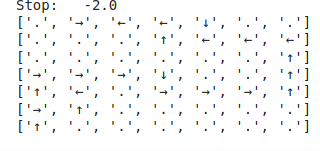